# How a histogram is being made:
---
Step by step implementation from scratch    
the figure was implemented using only the matplotlib basic functions.   

* nice instruction on how to create a histogram: https://www.youtube.com/watch?v=gSEYtAjuZ-Y


In [3]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

## Example data
client ages in restaurant

In [4]:
data = [1, 3, 4, 5, 6, 9, 16, 18, 19, 22, 25, 
        26, 27, 29, 32, 42, 45, 51, 58, 63] # sorted(data)

## Histogram

### Step 1. decide on the number of bins/buckets

In [6]:
bin_nr = 7

### Step 2   Calculate bin size
Steps 2 and 3 are the most important part or caulations, becuase all values in a data will be assignt to each bin, based on their, number, size and range  

__In our example we will use the following formula__  
* bin_size = (max_value - min_vale)/bin_nr
* results will be rounded up, and if we encounter the whole number eg. 5, we will add 1 to it (it is done, so the bars are touching each other on a plot)
    * eg: 5.456 -> 6
    * 5     -> 6
    * 6     -> 7


__Caution:__   
the differences in histograms calculated wiht different methods comes from different bin size and range.

__Our example__   
expected results are: if bin_nr = 7; bin_size = 9

In [ ]:
bin_size = (max(data)-min(data))/bin_nr
if math.ceil(bin_size)==bin_size:  
    bin_size +=1
else: 
    bin_size = math.ceil(bin_size)

### Step 3. Calculate bin ranges; 
__Our example__
* here we start at min(data) that is equal to 1.
* the end of the last bin may go over the max(data)
* therefore, if bin_nr=7; it shoudl be:
    * [(1, 9), (10, 18), (19, 27), (28, 36), (37, 45), (46, 54), (55, 63)]
    
__Caution__   
the results will be different if you start at 0!!



In [7]:
bin_sizes = []
for i in range(0,bin_nr):
    if i == 0:
        start = min(data)
        end = start+bin_size-1
    else:
        start = end+1
        end = start+bin_size-1
    bin_sizes.append((start, end))

### Step 4.Calculate frequency for each bin
i.e assign each value from the datasets to each bin, and check how many of them is there.

In [8]:
bin_frequency = []
for i in range(bin_nr):
    
    start =  bin_sizes[i][0]
    end = bin_sizes[i][1]
    bin_freq = np.sum([1 if (x>=start) & (x<=end) else 0 for x in data]) 
    # Caution, this algorith would work only wiht integers, not floats.
    bin_frequency.append(bin_freq)

    # results:
    # data = [1, 3, 4, 5, 6, 9, 16, 18, 19, 22, 25, 26, 27, 29, 32, 42, 45, 51, 58, 63]
    #
    # id      bin     |  frequency
    # -------------------------------
    # 1.   (1, 9)     |      6
    # 2.   (10, 18)   |      2
    # 3.   (19, 27)   |      5
    # 4.   (28, 36)   |      2
    # 5.   (37, 45)   |      2
    # 6.   (46, 54)   |      1
    # 7.   (55, 63)   |      2

### Step 5. Create a histogram 
for this, we will use recatagular patches:     
    that take the following parameters: 
    Rectangle(xy, width, height[, angle])

[(1, 9), (10, 18), (19, 27), (28, 36), (37, 45), (46, 54), (55, 63)]

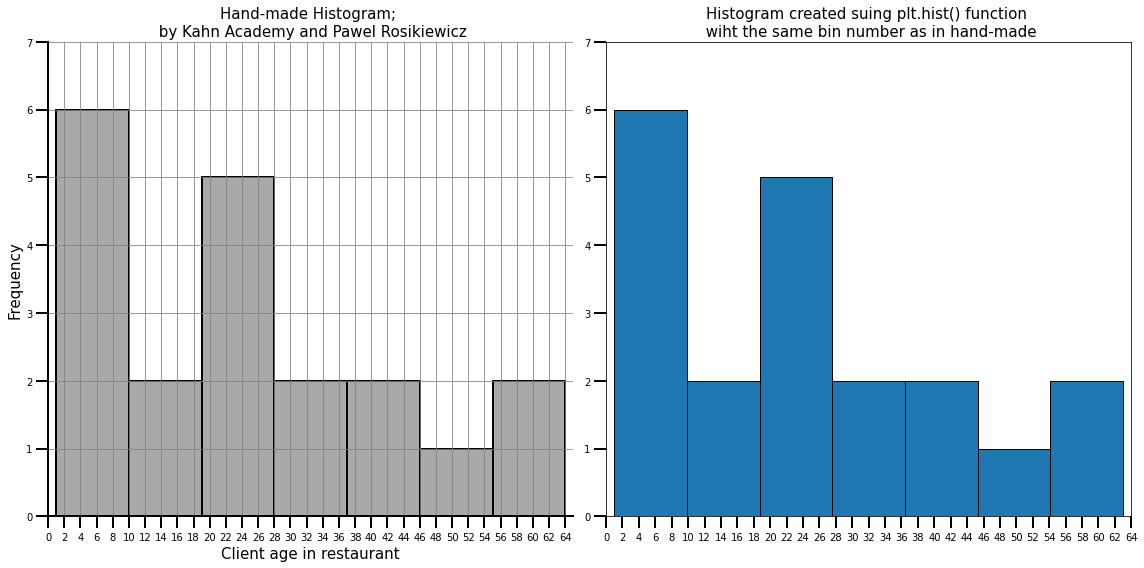

In [1]:
# import required function
from matplotlib.patches import Rectangle 

# create a figure
fig = plt.figure(figsize=(16,8))

# ---------------------------
# hand made hist wiht rectangels
# ---------------------------
ax = fig.add_subplot(121)
for i in range(bin_nr):
    bottom_left_X = bin_sizes[i][0]
    bottom_left_Y = 0 # all bars starts at 0, in that example
    bin_width = bin_size
    bin_height = bin_frequency[i]
    ax.add_patch(Rectangle((bottom_left_X, bottom_left_Y), bin_width, bin_height, 
                           alpha=1, color="darkgrey",ec="black", lw=2))
    
# set up axes limits, title and labels
ax.set_xlim(bin_sizes[0][0]-1,bin_sizes[bin_nr-1][1]+2)
ax.set_ylim(0, max(bin_frequency)+1)
ax.set_xlabel("Client age in restaurant", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.set_title("Hand-made Histogram; \n by Kahn Academy and Pawel Rosikiewicz", fontsize=15)

# remove lines on right and top
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
# set color and line width for visible spines
ax.spines['bottom'].set_color("black") # x axis
ax.spines['left'].set_color("black")   # y axis
ax.spines['bottom'].set_linewidth(2) # x axis
ax.spines['left'].set_linewidth(2) # x axis

# add more ticks than by default
ax.set_xticks(list(range(0,max(data)+2,2)))

# set color, size and direction for ticks
ax.tick_params(axis='x', colors='black', direction='out', length=12, width=2) # tick only
ax.tick_params(axis='y', colors='black', direction='out', length=12, width=2) # tick only

# Show ticks only on the visible spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# add grid to easier read the data in each bin
ax.grid(True, color="grey")


# ---------------------------
# hist with plt.hist()
# ---------------------------

# create a figure
ax = fig.add_subplot(122)
ax.hist(data, bins=bin_nr, edgecolor="black")

# limits, title, and ticks (like before)
ax.set_xlim(bin_sizes[0][0]-1,bin_sizes[bin_nr-1][1]+1)
ax.set_ylim(0, max(bin_frequency)+1)
ax.set_xticks(list(range(0,max(data)+2,2)))
ax.set_title("Histogram created suing plt.hist() function \n wiht the same bin number as in hand-made", fontsize=15)

# Only show ticks on the left and bottom spines, and makde then as before.
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='x', colors='black', direction='out', length=12, width=2) # tick only
ax.tick_params(axis='y', colors='black', direction='out', length=12, width=2) # tick only

# !!! we ommited some eastetics to make the code shorter !!!

# Finally, fix layout 
# so the text and histograms do not overal with each other 
plt.tight_layout()
bin_sizes